# Neural Network classification with PyTorch

## Objectives of the experiment

1) To implement neural network classification on a dataset features that cannot be represented and seperable in 2D/3D space.

3) Initializing weight to Xavier uniform initialization instead of random values

2) tanh activation function

3) Compare the accuracies of the models created using the entire dataset Vs feautures that are modified through Principal component analysis and other features to understand the significance of these methods on accuracy of the model

## Making classification data and getting it ready

In [1]:
import sklearn
from sklearn.datasets import make_hastie_10_2

# Make 1000 samples
X, y = make_hastie_10_2(n_samples=1000,
                        random_state=42)

X.shape, y.shape

((1000, 10), (1000,))

### Look at first 5 samples

In [2]:
X[:5],y[:5]

(array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
         -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
        [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
         -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
        [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
          0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
        [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
         -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
        [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
         -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016]]),
 array([-1.,  1., -1.,  1., -1.]))

### Understand the input and output shapes

In [3]:
X.shape, y.shape

((1000, 10), (1000,))

In [4]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y is {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y is {y_sample.shape}")


Values for one sample of X: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004] and the same for y is -1.0
Shape for one sample of X: (10,) and the same for y is ()


### Making dataframes of given data

In [5]:
import pandas as pd

# Generate the columns dynamically rather than creating column by column
columns = [f"X{i+1}" for i in range(X.shape[1])]

# Create the DataFrame
hasties = pd.DataFrame(X, columns=columns)
hasties['label'] = y

hasties.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,label
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,-1.0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-1.0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,1.0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,-1.0
5,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,-1.0
6,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,-1.0
7,0.361396,1.538037,-0.035826,1.564644,-2.619745,0.821903,0.087047,-0.299007,0.091761,-1.987569,1.0
8,-0.219672,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,-1.0
9,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,-1.0


In [6]:
# See how many instances of each label are present
hasties.label.value_counts()

,count
label,
-1.0,516
1.0,484


## VISUALIZE, VISUALIZE, VISUALIZE !!!

### SNS Pairplot

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# When dealing with multiple dimensions this sns.pairplot helps us understand the relation
# of one feature with respect to other feature

#sns.pairplot(hasties,hue='label')

### Using PCA

Reducing the 10 dimensions into 2 dimensions and then plotting a scatter plot.

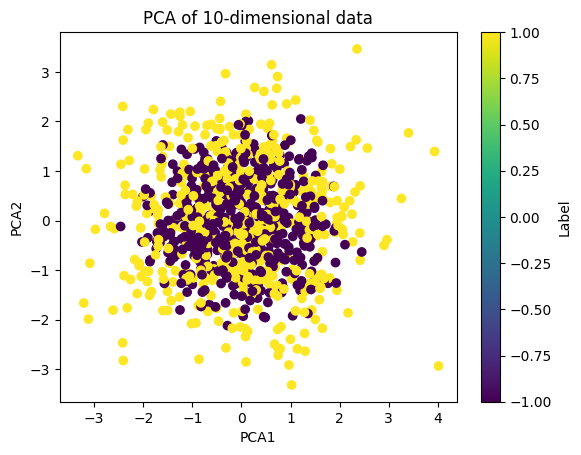

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Scatter plot the reduced 2D data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of 10-dimensional data')
plt.colorbar(label='Label')
plt.show()


### t-SNE for Non-Linear Data

If our data is not linearly seperable, this might be a better visualization than other methods -> might be a better method when working with complex data structures.

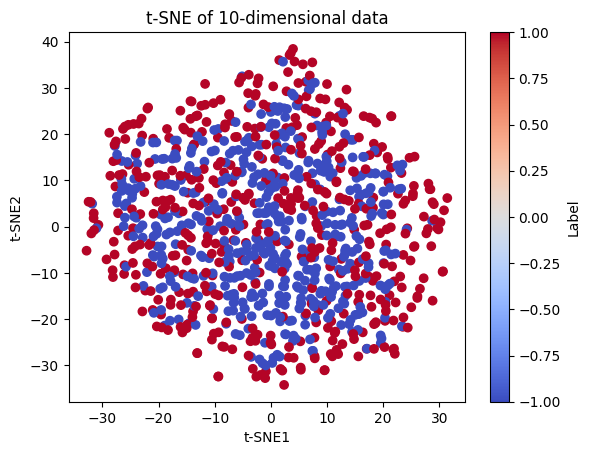

In [9]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Scatter plot the reduced 2D data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE of 10-dimensional data')
plt.colorbar(label='Label')
plt.show()

### Feature correlation heatmap

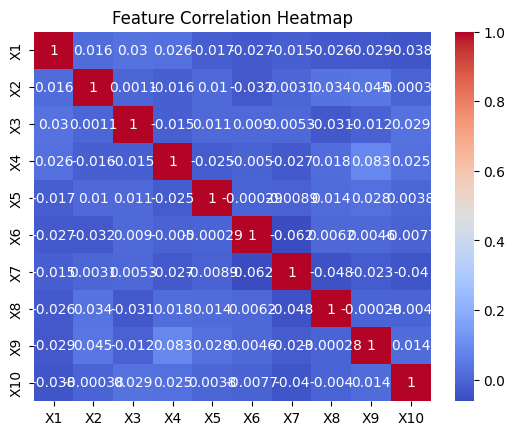

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd

# Create a correlation matrix
df = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Turn data into tensors and create train and test splits

In [11]:
# Turn data into tensors
import torch
print(torch.__version__)

2.4.0+cu121


In [12]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

### Turn data from nd arrays into tensors

In [13]:
X = torch.from_numpy(X).type(torch.float) # converts to float32 -> PyTorch default
y = torch.from_numpy(y).type(torch.float)

X[:2],y[:2]

(tensor([[ 0.4967, -0.1383,  0.6477,  1.5230, -0.2342, -0.2341,  1.5792,  0.7674,
          -0.4695,  0.5426],
         [-0.4634, -0.4657,  0.2420, -1.9133, -1.7249, -0.5623, -1.0128,  0.3142,
          -0.9080, -1.4123]]),
 tensor([-1.,  1.]))

In [14]:
type(X),type(y),X.dtype,y.dtype,X.shape,y.shape

(torch.Tensor,
 torch.Tensor,
 torch.float32,
 torch.float32,
 torch.Size([1000, 10]),
 torch.Size([1000]))

### Split data into training and test sets

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 is 20% will be test dataset and 80% is train dataset
                                                    random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 10]),
 torch.Size([200, 10]),
 torch.Size([800]),
 torch.Size([200]))

## Building a model

Let's build a model to classify our input features.

To do so, we want to:

1. Setup device agnostic code, so that our code will run on GPU if there is one

2. Construct a model (by subclassing `nn.Module)

3. Define loss function and optimizer

4. Create a training and test loop

In [16]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Construct a model that subclasses nn.Module

In [17]:
# Construct a model that subclasses nn.Module
class ModelV0(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),
        nn.Tanh()

    )
    # Call weight initialization function after layers are defined
    self._initialize_weights()

  def forward(self,x):
    return self.linear_layer_stack(x)

# Custom function to initialize weights using Xavier uniform initialization
  def _initialize_weights(self):
      for m in self.modules():
          if isinstance(m, nn.Linear):
              nn.init.xavier_uniform_(m.weight)
              if m.bias is not None:
                  nn.init.zeros_(m.bias)

### Create an instance of the model and send it to the target device

In [18]:
NUM_FEATURES = X.shape[1]
NUM_CLASSES = 1 # We only need one probability value to see which class it belongs to
RANDOM_SEED = 42
NUM_FEATURES, NUM_CLASSES

(10, 1)

In [19]:
model_1 = ModelV0(input_features=NUM_FEATURES,
                  output_features=NUM_CLASSES,
                  hidden_units=12).to(device)
model_1

ModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=10, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=1, bias=True)
    (7): Tanh()
  )
)

In [20]:
X_train.shape, y_train[:5]

(torch.Size([800, 10]), tensor([-1.,  1.,  1., -1., -1.]))

In [21]:
torch.unique(y_train)

tensor([-1.,  1.])

In [22]:
model_1.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.4353, -0.2024,  0.4841, -0.4251, -0.2574, -0.3757, -0.1799, -0.3650,
                       -0.4421, -0.5002],
                      [-0.2621, -0.0446, -0.2091,  0.4576, -0.1339,  0.1131,  0.2619,  0.5220,
                       -0.1122,  0.3433],
                      [ 0.3618,  0.1658, -0.2074, -0.0143,  0.4806,  0.4442, -0.1476,  0.4245,
                        0.2909, -0.4828],
                      [ 0.0908, -0.1396,  0.3134,  0.1715,  0.3776, -0.0369, -0.4211, -0.3571,
                        0.0051,  0.3646],
                      [-0.2933, -0.0991,  0.1804,  0.0444, -0.3730,  0.1511,  0.0390, -0.3749,
                       -0.1460, -0.2538],
                      [-0.1913, -0.5174,  0.1576,  0.4219,  0.1702, -0.3562,  0.0801,  0.1078,
                       -0.2039, -0.2857],
                      [ 0.3888, -0.5175,  0.1721, -0.3029, -0.1342, -0.1251, -0.4887,  0.1173,
                        0.1185, -0.157

### Untrained predictions

In [23]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_1(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nThresholded first 10 predictions:\n{torch.where(untrained_preds[:10]<0, torch.tensor(-1), torch.tensor(1))}")
print(f"\n First 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 10])

First 10 predictions:
tensor([[-0.2998],
        [-0.6926],
        [-0.3409],
        [-0.2598],
        [-0.3548],
        [-0.2046],
        [-0.6794],
        [-0.1380],
        [-0.2635],
        [-0.3402]], device='cuda:0')

Thresholded first 10 predictions:
tensor([[-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1]], device='cuda:0')

 First 10 labels:
tensor([-1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.])


### Creating a loss function and an optimizer for the binary classification problem

In [24]:
# Creating a loss function and optimizer
#loss_fn = nn.BCEWithLogitsLoss()
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

loss_fn, optimizer

(MSELoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

## Defining accuracy function

In [25]:
# Calculate accuracy -> (TP/TP+TN) * 100
# Out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() # How many of the y_true, y_pred are equal and their summation
  acc = (correct/len(y_pred))*100
  return acc

In [26]:
# testing accuracy function
sample_prediction_tensor = torch.randn(10,1)
sample_true_values_tensor = torch.randn(10,1)
print(f"Sample predictions tensor:{sample_prediction_tensor}")
print(f"Sample true values tensor:{sample_true_values_tensor}")
A_preds = torch.where(sample_prediction_tensor<0, torch.tensor(-1), torch.tensor(1)).squeeze()
print(f"{A_preds}, {A_preds.shape}")
A_true = torch.where(sample_true_values_tensor<0, torch.tensor(-1), torch.tensor(1)).squeeze()
print(f"{A_true}, {A_true.shape}")
correct_A = torch.eq(A_preds,A_true)
print(correct_A)
print(f"Number of correct matches:{correct_A.sum()} and the datatype of correct_A.sum() is:{correct_A.sum().dtype}") # torch integer type
print(correct_A.sum().item()) # conversion to normal integer
acc_A = (correct_A.sum().item()/len(A_preds))*100
print(f"Accuracy of A: {acc_A}")

Sample predictions tensor:tensor([[-1.1886],
        [ 1.4550],
        [ 0.0435],
        [ 0.7122],
        [-1.4721],
        [ 1.2103],
        [ 0.8999],
        [ 0.5362],
        [ 0.5961],
        [ 0.8139]])
Sample true values tensor:tensor([[ 0.2834],
        [-0.5441],
        [ 0.6482],
        [-0.1277],
        [ 0.0395],
        [ 1.1296],
        [ 0.2799],
        [-1.6959],
        [-0.0224],
        [-0.6900]])
tensor([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1]), torch.Size([10])
tensor([ 1, -1,  1, -1,  1,  1,  1, -1, -1, -1]), torch.Size([10])
tensor([False, False,  True, False, False,  True,  True, False, False, False])
Number of correct matches:3 and the datatype of correct_A.sum() is:torch.int64
3
Accuracy of A: 30.0


## Training a model

1) do the forward pass

2) calculate the loss

3) optimizer zero_grad()

4) loss.backward()

5) optimizer step step step !!!

In [27]:
# Training loop
epochs = 2000

# Setting up the parameters on the target device
X_train,X_test,y_train,y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)

for epoch in range(epochs):

  # Training mode
  model_1.train()

  # Do the forward pass
  y_logits = model_1(X_train).squeeze() #(800,1) -> 800
  y_preds = torch.where(y_logits<0, torch.tensor(-1), torch.tensor(1)).squeeze()

  # Calculate the loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  # loss.backward()
  loss.backward()

  # Optimizer step step step
  optimizer.step()

  # Testing loop
  model_1.eval()

  with torch.inference_mode():

    # Do the forward pass
    y_test_logits = model_1(X_test).squeeze()
    y_test_preds = torch.where(y_test_logits<0, torch.tensor(-1), torch.tensor(1)).squeeze()

    # Calculate the loss/acc
    test_loss = loss_fn(y_test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=y_test_preds)

  # Print what's happening
  if epoch % 200 == 0:
    print(f"Epoch:{epoch} | Training Loss: {loss:.4f} | Train_accuracy = {acc:.2f} | Test_loss: {test_loss:.4f} | Test_accuracy: {test_acc:.2f}")




Epoch:0 | Training Loss: 1.3247 | Train_accuracy = 52.88 | Test_loss: 1.2732 | Test_accuracy: 45.00
Epoch:200 | Training Loss: 0.6043 | Train_accuracy = 80.50 | Test_loss: 0.7444 | Test_accuracy: 72.50
Epoch:400 | Training Loss: 0.3287 | Train_accuracy = 88.88 | Test_loss: 0.4224 | Test_accuracy: 85.50
Epoch:600 | Training Loss: 0.2013 | Train_accuracy = 93.38 | Test_loss: 0.3336 | Test_accuracy: 88.50
Epoch:800 | Training Loss: 0.0536 | Train_accuracy = 99.38 | Test_loss: 0.2695 | Test_accuracy: 90.50
Epoch:1000 | Training Loss: 0.0312 | Train_accuracy = 99.50 | Test_loss: 0.2577 | Test_accuracy: 92.00
Epoch:1200 | Training Loss: 0.0212 | Train_accuracy = 99.62 | Test_loss: 0.2674 | Test_accuracy: 92.00
Epoch:1400 | Training Loss: 0.0189 | Train_accuracy = 99.62 | Test_loss: 0.2720 | Test_accuracy: 92.00
Epoch:1600 | Training Loss: 0.0178 | Train_accuracy = 99.62 | Test_loss: 0.2765 | Test_accuracy: 91.50
Epoch:1800 | Training Loss: 0.0171 | Train_accuracy = 99.62 | Test_loss: 0.2803 

## Comparing model accuracies when PCA is used instead of training with the entire dataset

In [28]:
X_reduced.shape,type(X_reduced)

((1000, 2), numpy.ndarray)

In [29]:
# Turn data into tensors
X_reduced = torch.from_numpy(X_reduced).type(torch.float32)
X_reduced.dtype, X_reduced.shape

(torch.float32, torch.Size([1000, 2]))

In [30]:
X_reduced[:5],y[:5]

(tensor([[-0.7073,  0.4316],
         [-0.3279, -0.7889],
         [ 0.2434, -0.6224],
         [-1.8323,  0.4965],
         [-0.0248,  0.6999]]),
 tensor([-1.,  1., -1.,  1., -1.]))

In [31]:
# Split data into training and testing datasets
from sklearn.model_selection import train_test_split

X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_reduced_train.shape, X_reduced_test.shape, y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [32]:
# Instantiating a model 2 with same configuration
model_2 = ModelV0(input_features=X_reduced.shape[1],
                  output_features=1,
                  hidden_units=8).to(device)
model_2

ModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Tanh()
  )
)

In [33]:
# Create a loss function and optimizer
# Creating a loss function and optimizer
#loss_fn = nn.BCEWithLogitsLoss()
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

loss_fn, optimizer

(MSELoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [34]:
X_reduced_train.shape

torch.Size([800, 2])

In [36]:
# Using the same model, loss function and optimizer above training with reduced data
# Putting the data on the target device
X_reduced_train, X_reduced_test, y_train, y_test = X_reduced_train.to(device),X_reduced_test.to(device),y_train.to(device),y_test.to(device)

# Epochs
epochs=2000

# Training loop
for epoch in range(epochs):

  # Training mode
  model_2.train()

  # Do the forward pass
  y_logits = model_2(X_reduced_train).squeeze() #(800,1) -> 800
  y_preds = torch.where(y_logits<0, torch.tensor(-1), torch.tensor(1)).squeeze()

  # Calculate the loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  # loss.backward()
  loss.backward()

  # Optimizer step step step
  optimizer.step()

  # Testing loop
  model_2.eval()

  with torch.inference_mode():

    # Do the forward pass
    y_test_logits = model_2(X_reduced_test).squeeze()
    y_test_preds = torch.where(y_test_logits<0, torch.tensor(-1), torch.tensor(1)).squeeze()

    # Calculate the loss/acc
    test_loss = loss_fn(y_test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=y_test_preds)

  # Print what's happening
  if epoch % 200 == 0:
    print(f"Epoch:{epoch} | Training Loss: {loss:.4f} | Train_accuracy = {acc:.2f} | Test_loss: {test_loss:.4f} | Test_accuracy: {test_acc:.2f}")



Epoch:0 | Training Loss: 0.8151 | Train_accuracy = 67.38 | Test_loss: 0.9277 | Test_accuracy: 60.50
Epoch:200 | Training Loss: 0.8142 | Train_accuracy = 67.12 | Test_loss: 0.9279 | Test_accuracy: 60.50
Epoch:400 | Training Loss: 0.8045 | Train_accuracy = 67.38 | Test_loss: 0.9345 | Test_accuracy: 61.50
Epoch:600 | Training Loss: 0.8066 | Train_accuracy = 67.75 | Test_loss: 0.9402 | Test_accuracy: 61.50
Epoch:800 | Training Loss: 0.7999 | Train_accuracy = 67.75 | Test_loss: 0.9353 | Test_accuracy: 61.00
Epoch:1000 | Training Loss: 0.7982 | Train_accuracy = 68.62 | Test_loss: 0.9393 | Test_accuracy: 60.50
Epoch:1200 | Training Loss: 0.7977 | Train_accuracy = 68.75 | Test_loss: 0.9371 | Test_accuracy: 60.00
Epoch:1400 | Training Loss: 0.7905 | Train_accuracy = 69.00 | Test_loss: 0.9404 | Test_accuracy: 61.50
Epoch:1600 | Training Loss: 0.7893 | Train_accuracy = 68.50 | Test_loss: 0.9382 | Test_accuracy: 60.00
Epoch:1800 | Training Loss: 0.7886 | Train_accuracy = 68.25 | Test_loss: 0.9383 

## Insights

1) tanh, MSE Vs BCE
 When using BCE or cross entropy loss functions, it is assumed that the output of the model is a probabilty i.e., a value between 0 and 1. Hence, it is important that we change the loss function to other functions such as MSE when we are having tanh in the final layer of the network.

2) PCA lost some important information regarding the data in this case. It is important to retain the important information from the data when we are using PCA. So, we can repeat the process with higher number of components rather than 2, so that, the model gets trained on more useful information.
-Feature scaling each feature to range 0-1 before applying PCA can also bring improvement